In [1]:
%pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl (7.7 MB)
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.51.0-cp312-cp31

# Data Storage

First we begin by storing data. This has already been done in the `data/` directory.

In [3]:
DATA_DIR = 'data/'

Import the data and take a look at it.

In [2]:
data = pd.read_csv(DATA_DIR + 'temp-uppsala.csv', sep=";", skiprows=10)

# data.plot(x='Datum', y='Lufttemperatur', title='Temperature in Uppsala')

# data.info()
data.head()

NameError: name 'DATA_DIR' is not defined

Merge the "Datum" and "Tid (UTC)" columns into a single datetime column.

In [5]:
data['DatumTid'] = data['Datum'] + ' ' + data['Tid (UTC)']
data['DatumTid'] = pd.to_datetime(data['DatumTid'], format='%Y-%m-%d %H:%M:%S')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319233 entries, 0 to 319232
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Datum           319233 non-null  object        
 1   Tid (UTC)       319233 non-null  object        
 2   Lufttemperatur  319233 non-null  float64       
 3   Kvalitet        319233 non-null  object        
 4   Unnamed: 4      0 non-null       float64       
 5   Tidsutsnitt:    13 non-null      object        
 6   DatumTid        319233 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 17.0+ MB


In [4]:
data.plot(x='DatumTid', y='Lufttemperatur', title='Temperature in Uppsala')

NameError: name 'data' is not defined

In [9]:
data = data[['DatumTid', 'Lufttemperatur']]

data.describe()

NameError: name 'data' is not defined

In [3]:
data_1993 = data[(data['DatumTid'] >= '1993-01-01') & (data['DatumTid'] <= '1993-12-31')]

data_1993['temp_rollingavg'] = data_1993['Lufttemperatur'].rolling(window=24).mean()
data_1993.tail(10)

NameError: name 'data' is not defined

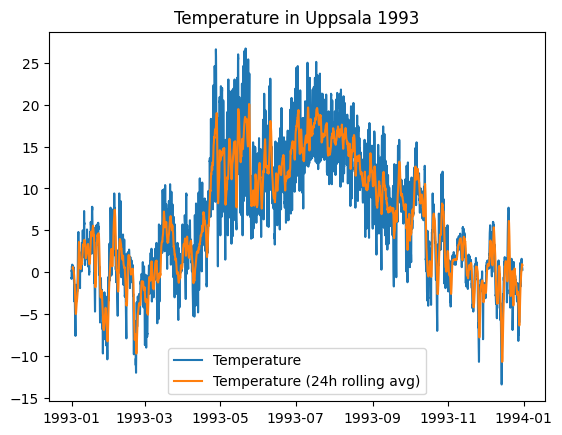

In [9]:
fig, ax = plt.subplots()

ax.plot(data_1993['DatumTid'], data_1993['Lufttemperatur'], label='Temperature')
ax.plot(data_1993['DatumTid'], data_1993['temp_rollingavg'], label='Temperature (24h rolling avg)')
ax.set_title('Temperature in Uppsala 1993')
ax.legend()

plt.show()

# data_1993.plot(x='DatumTid', y='Lufttemperatur', title='Temperature in Uppsala 1993')
# data_1993.plot(x='DatumTid', y='temp_rollingavg', title='Temperature in Uppsala 1993')

/var/folders/pg/6tvtzc815214nstb4nc45dcw0000gn/T/ipykernel_75917/3331710282.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_1993.resample('M', on='DatumTid').mean().plot(y='Lufttemperatur', title='Temperature in Uppsala')


<Axes: title={'center': 'Temperature in Uppsala'}, xlabel='DatumTid'>

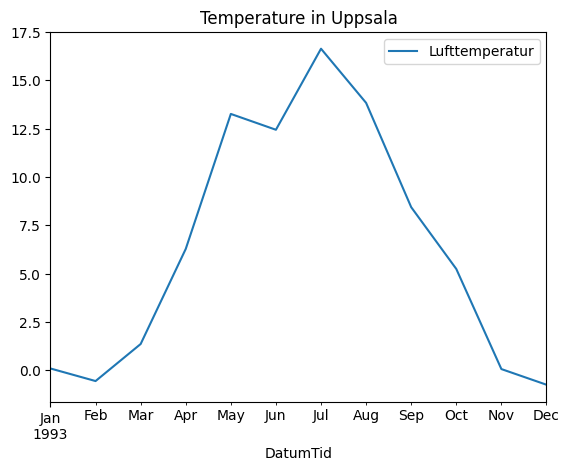

In [10]:
data_1993.resample('M', on='DatumTid').mean().plot(y='Lufttemperatur', title='Temperature in Uppsala')

<Axes: title={'center': 'Temperature in Uppsala'}, xlabel='DatumTid'>

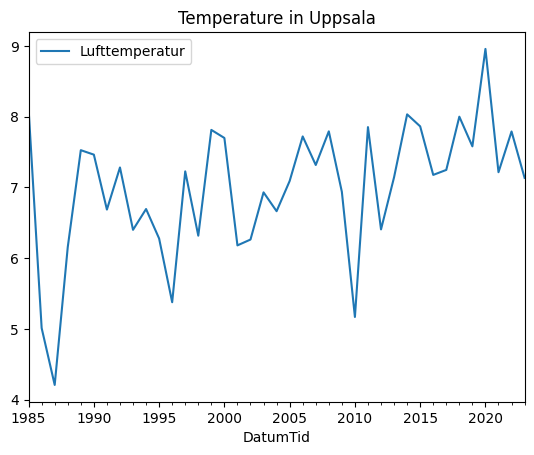

In [12]:
data[data['DatumTid'] < '2024'].resample('YE', on='DatumTid').mean().plot(y='Lufttemperatur', title='Temperature in Uppsala')